<a href="https://colab.research.google.com/github/renatamontanhana/-creditcardfraud_deep_learning_study/blob/main/Auto_Encoder_CreditFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('/content/creditcard.csv')
df.info()

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89220.000000,89219.000000,...,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000,89219.000000
mean,39715.015501,-0.265000,-0.039318,0.678729,0.162808,-0.278291,0.094282,-0.109561,0.054698,-0.028905,...,-0.029895,-0.106761,-0.037413,0.009718,0.132571,0.027095,0.001317,0.002412,98.532339,0.002365
std,16026.485819,1.873458,1.662182,1.352995,1.359523,1.370149,1.302130,1.230881,1.215535,1.129755,...,0.727551,0.634882,0.625389,0.594412,0.441100,0.496667,0.389659,0.326436,266.941369,0.048574
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,32165.000000,-1.028772,-0.603310,0.182821,-0.719037,-0.897378,-0.646335,-0.601120,-0.139866,-0.692643,...,-0.223859,-0.526395,-0.177767,-0.322006,-0.131948,-0.325915,-0.063273,-0.005744,7.675000,0.000000
50%,42017.000000,-0.262209,0.071676,0.760383,0.185833,-0.313066,-0.156213,-0.070878,0.071465,-0.102804,...,-0.057810,-0.082239,-0.049619,0.064928,0.171090,-0.070776,0.009396,0.023123,26.990000,0.000000
75%,52274.250000,1.152744,0.727352,1.386516,1.037554,0.254270,0.488962,0.416670,0.355072,0.589973,...,0.118714,0.309107,0.081203,0.406088,0.420191,0.306496,0.082733,0.076409,89.950000,0.000000
max,62480.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.Class.value_counts()

Class
0.0    89008
1.0      211
Name: count, dtype: int64

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

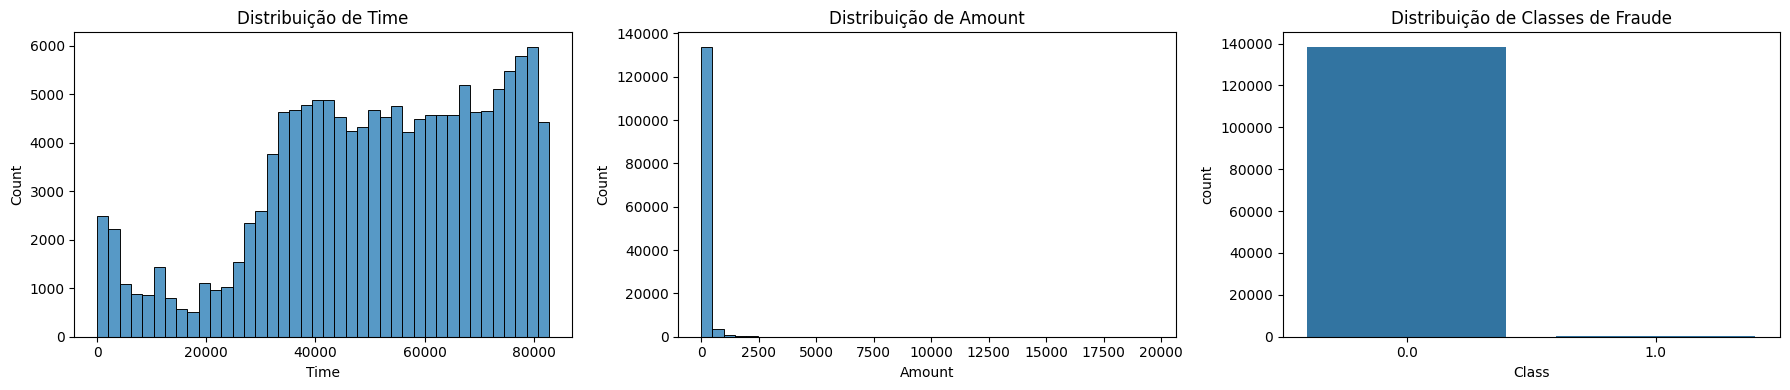

In [ ]:
# Visualizando as primeiras linhas
print(df.head())

# Informações básicas
print(df.info())

# Estatísticas descritivas
print(df.describe())

# Verificação de valores faltantes
print(df.isnull().sum())

# Distribuição da variável Classe (fraude ou não)
print(df['Class'].value_counts(normalize=True))

# Plotando a distribuição de algumas variáveis
fig, ax = plt.subplots(1, 3, figsize=(18, 4))
sns.histplot(df['Time'], bins=40, ax=ax[0], kde=False)
ax[0].set_title('Distribuição de Time')
sns.histplot(df['Amount'], bins=40, ax=ax[1], kde=False)
ax[1].set_title('Distribuição de Amount')
sns.countplot(x='Class', data=df, ax=ax[2])
ax[2].set_title('Distribuição de Classes de Fraude')
plt.tight_layout()
plt.show()

In [ ]:
# Remover linhas com valores nulos
df = df.dropna()

# Separação entre características e alvo
X = df.drop(['Class'], axis=1)
y = df['Class']

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Dados de treino e teste preparados.")

Dados de treino e teste preparados.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Definindo a arquitetura do autoencoder
input_dim = X_train.shape[1]  # Número de características
input_layer = Input(shape=(input_dim,))
encoded = Dense(14, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)
autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinamento do autoencoder
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True),
    ModelCheckpoint('autoencoder_model.h5', monitor='val_loss', save_best_only=True)
]

history = autoencoder.fit(X_train[y_train == 0], X_train[y_train == 0],
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1,
                          callbacks=callbacks)

# Avaliação do modelo usando o conjunto de teste
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
error_df = pd.DataFrame({
    'Reconstruction_error': mse,
    'True_class': y_test
})

# Estabelecer um limiar para identificar uma transação como fraudulenta
threshold = np.percentile(error_df['Reconstruction_error'], 95)

# Detectar fraudes
error_df['Prediction'] = (error_df['Reconstruction_error'] > threshold).astype(int)

# Avaliar o desempenho
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(error_df['True_class'], error_df['Prediction']))
print(classification_report(error_df['True_class'], error_df['Prediction']))


Epoch 1/50
347/347 [==============================] - 2s 4ms/step - loss: 0.8634 - val_loss: 0.6293
Epoch 2/50
 52/347 [===>..........................] - ETA: 0s - loss: 0.6404

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


347/347 [==============================] - 2s 5ms/step - loss: 0.5604 - val_loss: 0.4800
Epoch 3/50
347/347 [==============================] - 1s 2ms/step - loss: 0.4675 - val_loss: 0.4282
Epoch 4/50
347/347 [==============================] - 1s 2ms/step - loss: 0.4292 - val_loss: 0.4010
Epoch 5/50
347/347 [==============================] - 1s 2ms/step - loss: 0.4080 - val_loss: 0.3860
Epoch 6/50
347/347 [==============================] - 1s 2ms/step - loss: 0.3962 - val_loss: 0.3778
Epoch 7/50
347/347 [==============================] - 1s 2ms/step - loss: 0.3899 - val_loss: 0.3740
Epoch 8/50
347/347 [==============================] - 1s 2ms/step - loss: 0.3864 - val_loss: 0.3713
Epoch 9/50
347/347 [==============================] - 1s 3ms/step - loss: 0.3843 - val_loss: 0.3707
Epoch 10/50
347/347 [==============================] - 1s 2ms/step - loss: 0.3827 - val_loss: 0.3690
Epoch 11/50
347/347 [==============================] - 1s 2ms/step - loss: 0.3816 - val_loss: 0.3691
Epoch 12/

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Definindo a arquitetura do autoencoder
input_dim = X_train.shape[1]  # Número de características
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dropout(0.1)(encoded)  # Dropout para regularização
encoded = Dense(16, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)
autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Treinamento do autoencoder
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True),
    ModelCheckpoint('autoencoder_model.h5', monitor='val_loss', save_best_only=True, save_format='h5')
]

# Filtrar apenas dados não fraudulentos usando máscara booleana
mask = y_train == 0
history = autoencoder.fit(X_train[mask], X_train[mask],  # Usando máscara booleana para dados normais
                          epochs=100,
                          batch_size=128,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1,
                          callbacks=callbacks)


Epoch 1/100
693/693 [==============================] - 9s 8ms/step - loss: 0.7765 - val_loss: 0.5723
Epoch 2/100
 10/693 [..............................] - ETA: 4s - loss: 0.6248

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


693/693 [==============================] - 7s 11ms/step - loss: 0.5435 - val_loss: 0.4287
Epoch 3/100
693/693 [==============================] - 3s 4ms/step - loss: 0.4485 - val_loss: 0.3568
Epoch 4/100
693/693 [==============================] - 2s 3ms/step - loss: 0.3958 - val_loss: 0.3090
Epoch 5/100
693/693 [==============================] - 2s 2ms/step - loss: 0.3590 - val_loss: 0.2826
Epoch 6/100
693/693 [==============================] - 2s 3ms/step - loss: 0.3339 - val_loss: 0.2514
Epoch 7/100
693/693 [==============================] - 2s 3ms/step - loss: 0.3094 - val_loss: 0.2333
Epoch 8/100
693/693 [==============================] - 2s 3ms/step - loss: 0.2943 - val_loss: 0.2212
Epoch 9/100
693/693 [==============================] - 5s 7ms/step - loss: 0.2818 - val_loss: 0.2075
Epoch 10/100
693/693 [==============================] - 3s 4ms/step - loss: 0.2723 - val_loss: 0.1986
Epoch 11/100
693/693 [==============================] - 2s 2ms/step - loss: 0.2628 - val_loss: 0.1909

868/868 [==============================] - 3s 4ms/step
Confusion Matrix:
[[27533   154]
 [   17    41]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     27687
         1.0       0.21      0.71      0.32        58

    accuracy                           0.99     27745
   macro avg       0.60      0.85      0.66     27745
weighted avg       1.00      0.99      1.00     27745

ROC AUC Score: 0.9296252567182656


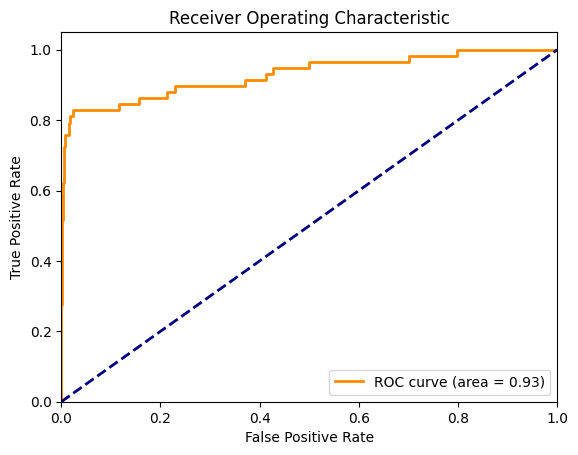

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc

# Predições e cálculo do erro de reconstrução
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
error_df = pd.DataFrame({
    'Reconstruction_error': mse,
    'True_class': y_test
})

# Estabelecer um limiar para identificar uma transação como fraudulenta
# Limiar calculado de forma manual
threshold = np.percentile(error_df['Reconstruction_error'], 99.3)

# Detectar fraudes
error_df['Prediction'] = (error_df['Reconstruction_error'] > threshold).astype(int)

# Avaliação do desempenho
print("Confusion Matrix:")
print(confusion_matrix(error_df['True_class'], error_df['Prediction']))

print("\nClassification Report:")
print(classification_report(error_df['True_class'], error_df['Prediction']))

# Cálculo da AUC-ROC
roc_auc = roc_auc_score(error_df['True_class'], error_df['Reconstruction_error'])
print("ROC AUC Score:", roc_auc)

# Calculando e plotando a curva ROC
fpr, tpr, thresholds = roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc_val = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


868/868 [==============================] - 7s 8ms/step
Optimal threshold: 2.57
Maximum F1-Score: 0.4444
Confusion Matrix:
[[27668    19]
 [   37    21]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27687
         1.0       0.53      0.36      0.43        58

    accuracy                           1.00     27745
   macro avg       0.76      0.68      0.71     27745
weighted avg       1.00      1.00      1.00     27745

ROC AUC Score with optimal threshold: 0.9296252567182656


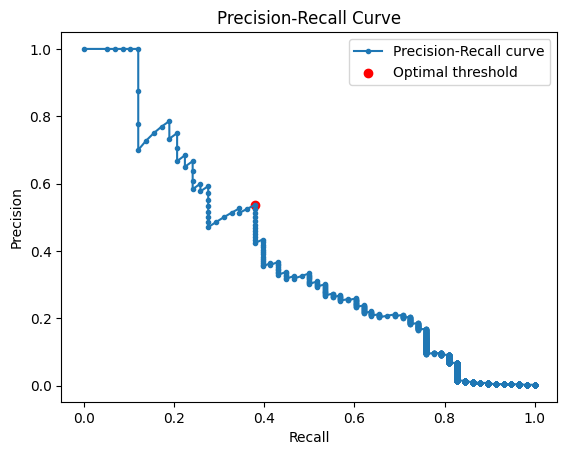

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_recall_curve

# Predições e cálculo do erro de reconstrução
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
error_df = pd.DataFrame({
    'Reconstruction_error': mse,
    'True_class': y_test
})

# Gerar pontos para a curva de precisão-recall
precision, recall, thresholds = precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

# Calcular o F1-score para cada possível limiar
f1_scores = 2 * recall * precision / (recall + precision)
# Remover possíveis valores NaN ou infinitos
f1_scores = np.nan_to_num(f1_scores)

# Encontrar o índice do maior F1-score
# Usar o LIMIAR OTIMIZADO para o melhor F1 SCORE
optimal_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_index]
optimal_f1 = f1_scores[optimal_index]

print("Optimal threshold: {:.2f}".format(optimal_threshold))
print("Maximum F1-Score: {:.4f}".format(optimal_f1))

# Usar o limiar ótimo para detectar fraudes
error_df['Prediction'] = (error_df['Reconstruction_error'] > optimal_threshold).astype(int)

# Avaliação do desempenho com o limiar ótimo
print("Confusion Matrix:")
print(confusion_matrix(error_df['True_class'], error_df['Prediction']))
print("\nClassification Report:")
print(classification_report(error_df['True_class'], error_df['Prediction']))

# Cálculo e plotagem da curva ROC com o limiar ótimo
roc_auc = roc_auc_score(error_df['True_class'], error_df['Reconstruction_error'])
print("ROC AUC Score with optimal threshold:", roc_auc)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.scatter(recall[optimal_index], precision[optimal_index], marker='o', color='red', label='Optimal threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


##Conclusão

Se o Problema da Empresa for perda financeira por fraude, o limiar de 99.3 acerta mais fraudes que o limiar 2.57

Se o problema for detectar fraudes mas sem ficar incomodando cliente com falsos positivos, o limiar 2.57 é melhor pois erra menos que o 99.3 para falso positivo

### Report

**Limiar de 99.3:**

Acerta mais fraudes: Ao definir um limiar mais alto, como 99.3, o modelo tende a ser mais sensível na detecção de fraudes. Isso significa que ele classificará mais transações como fraudulentas, o que pode resultar em menos fraudes verdadeiras passando despercebidas (menos falsos negativos).


Potencialmente mais falsos positivos: No entanto, ao ser mais sensível, pode gerar mais falsos positivos, ou seja, classificar transações legítimas como fraudulentas. Isso pode levar a uma experiência negativa para os clientes, já que terão suas transações legítimas marcadas como suspeitas.


**Limiar de 2.57:**
Menos falsos positivos: Definindo um limiar mais baixo, como 2.57, o modelo é mais conservador e menos sensível. Ele tende a ser mais preciso na identificação de fraudes, reduzindo o número de falsos positivos.

Potencialmente mais falsos negativos: Por outro lado, ao ser mais conservador, o modelo pode perder algumas fraudes verdadeiras, resultando em mais falsos negativos, ou seja, fraudes reais que não são detectadas.

Portanto, sua conclusão é correta ao considerar o contexto específico da empresa e o objetivo da detecção de fraudes.

 Se a prioridade é minimizar perdas financeiras por fraudes e a empresa está disposta a lidar com mais falsos positivos para garantir que menos fraudes reais passem despercebidas, o limiar de 99.3 pode ser mais apropriado.

Por outro lado, se a empresa quer evitar incomodar os clientes com falsos positivos e prioriza uma experiência mais suave para os usuários, o limiar de 2.57, que reduz significativamente os falsos positivos, pode ser a melhor escolha, mesmo que isso signifique potencialmente perder algumas fraudes verdadeiras.
